### Drug Types EDA & Classification 

The target feature is -> Drug type

The feature sets are:
<ul>
<li>Age</li>
<li>Sex</li>
<li>Blood Pressure Levels (BP)</li>
<li>Cholesterol Levels</li>
<li>Na to Potassium Ration</li>
</ul>

Kaggle Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification/discussion

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Model Evaluations
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

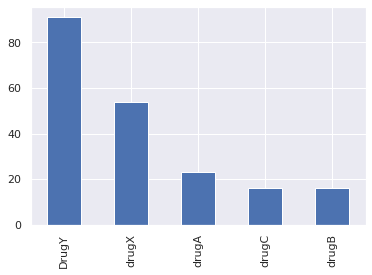

In [9]:
df['Drug'].value_counts().plot.bar();

In [5]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

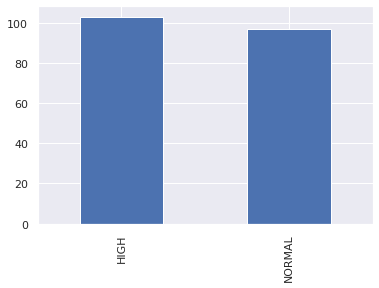

In [13]:
df["Cholesterol"].value_counts().plot.bar();

In [6]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

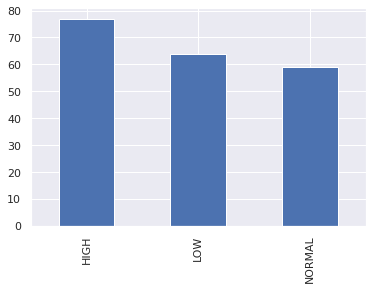

In [14]:
df["BP"].value_counts().plot.bar();

In [7]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [10]:
df.shape

(200, 6)

In [15]:
le1 = preprocessing.LabelEncoder()
df['Drug']= le1.fit_transform(df['Drug'])
df['Cholesterol']= le1.fit_transform(df['Cholesterol'])
df['BP']= le1.fit_transform(df['BP'])
df['Sex']= le1.fit_transform(df['Sex'])

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [18]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [19]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


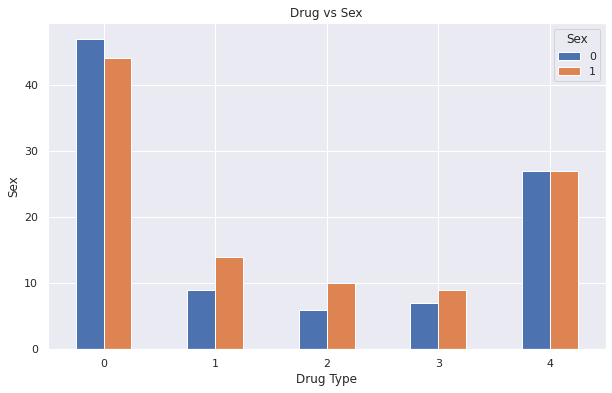

In [20]:
pd.crosstab(df["Drug"], df["Sex"]).plot(kind="bar",figsize=(10, 6))
plt.title("Drug vs Sex")
plt.xlabel("Drug Type")
plt.ylabel("Sex")
plt.xticks(rotation=0);

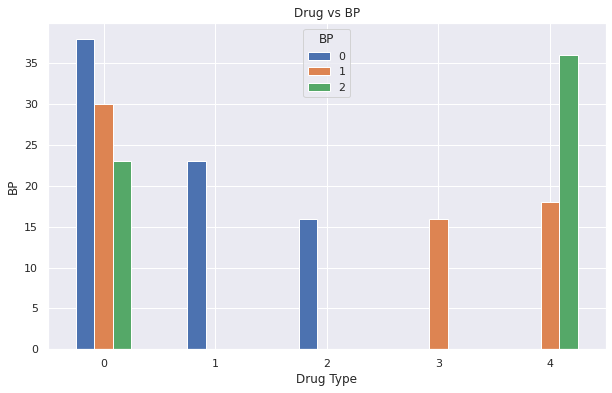

In [21]:
pd.crosstab(df["Drug"], df["BP"]).plot(kind="bar",figsize=(10, 6))
plt.title("Drug vs BP")
plt.xlabel("Drug Type")
plt.ylabel("BP")
plt.xticks(rotation=0);

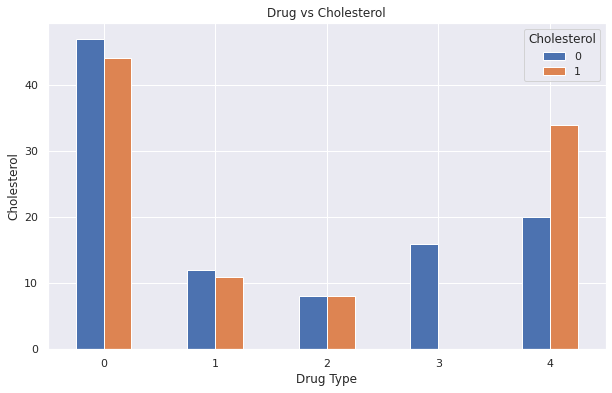

In [22]:
pd.crosstab(df["Drug"], df["Cholesterol"]).plot(kind="bar",figsize=(10, 6))
plt.title("Drug vs Cholesterol")
plt.xlabel("Drug Type")
plt.ylabel("Cholesterol")
plt.xticks(rotation=0);

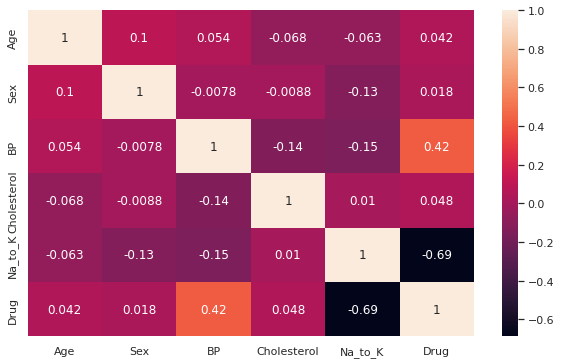

In [25]:
plt.figure(figsize=(10,6))
x = sns.heatmap(df.corr(),annot=True)

### Conclusion:
<ul>
<li>DrugY -> Drug Type 0 is the highest usage</li>
<li>Cholesterol Type 1 cannot have Drug Type 3</li>
<li>Drugs are also almost equally distributed among the genders male and female.</li>
</ul>

In [26]:
# Split data into train and test sets
np.random.seed(42)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df.drop("Drug", axis = 1),df["Drug"],test_size=0.1)

In [28]:
x = df.drop("Drug", axis = 1)
y = df["Drug"]

p_values = f_regression(x,y)[1]

In [29]:
columns_list = []

col = list(df.columns)
iter_df = 0

for value in p_values:
    if col[iter_df] == "close":
        iter_df += 1
        
    columns_list.append({col[iter_df] : value.round(3)})
    iter_df += 1
    
columns_list

[{'Age': 0.556},
 {'Sex': 0.798},
 {'BP': 0.0},
 {'Cholesterol': 0.496},
 {'Na_to_K': 0.0}]

In [30]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),"Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
print(model_scores)

{'KNN': 0.6, 'Random Forest': 1.0}


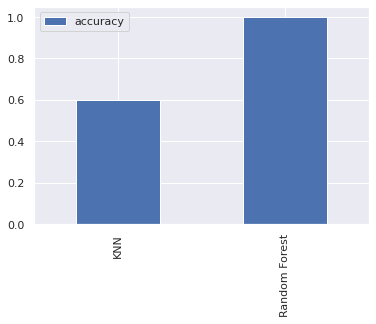

In [33]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();